In [2]:
import pandas as pd 
import numpy as np 
import random as rd 
from sklearn.decomposition import PCA 
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [15]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Generate random data
for gene in data.index:
    data.loc[gene, 'wt1': 'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1': 'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,795,834,838,841,778,237,235,231,235,244
gene2,661,641,655,631,652,171,212,194,207,183
gene3,292,310,304,276,293,294,350,310,342,319
gene4,167,187,190,167,176,674,738,749,782,699
gene5,252,257,234,252,242,43,45,36,42,47


In [25]:
# First we scaled the data

scaled_data = preprocessing.scale(data.T)
scaled_data.shape

pca = PCA()

pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)


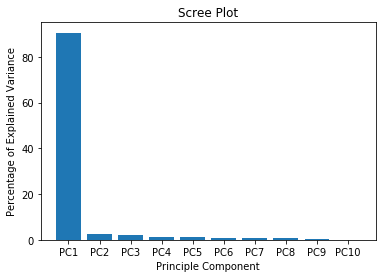

In [26]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x= range(1, len(per_var)+1), height=per_var, tick_label =labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principle Component")
plt.title("Scree Plot")
plt.show()

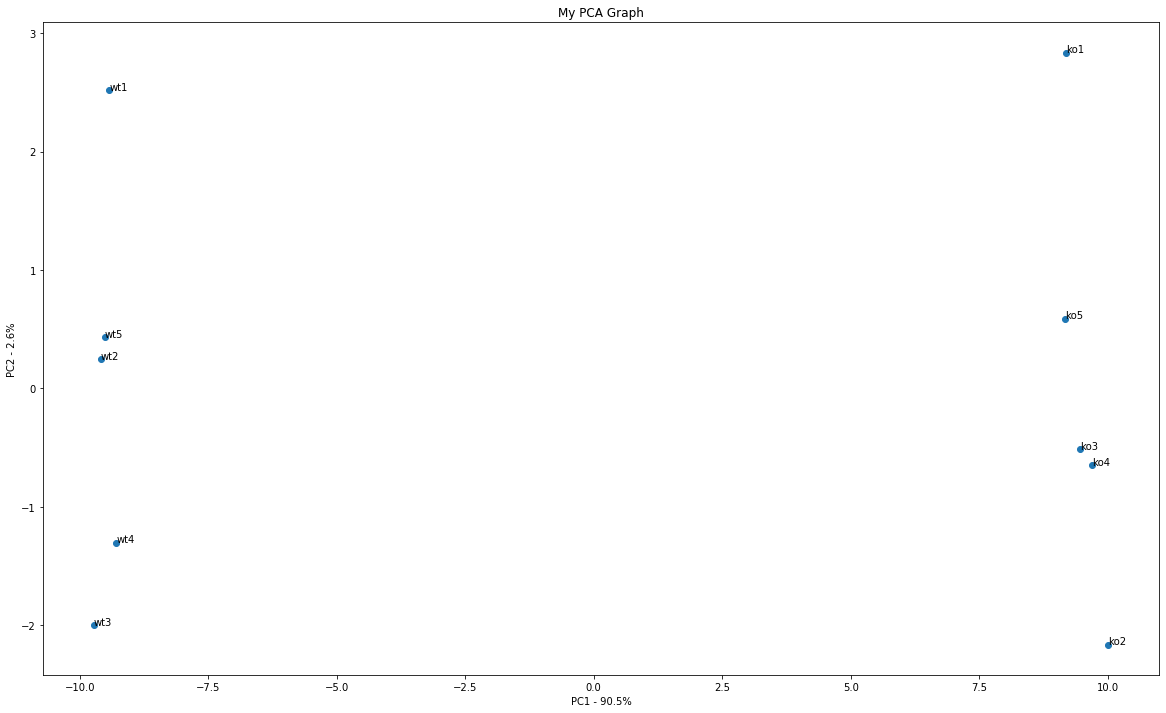

In [34]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.figure(figsize=(20,12))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel('PC1 - {0}%' .format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))